In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/train_essays.csv')
df = df.iloc[:, -2:]
df

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0
...,...,...
1373,There has been a fuss about the Elector Colleg...,0
1374,Limiting car usage has many advantages. Such a...,0
1375,There's a new trend that has been developing f...,0
1376,As we all know cars are a big part of our soci...,0


In [3]:
# Read and select columns for each dataframe
df1 = pd.read_csv('data/train_drcat_01.csv').iloc[:, :2]
df2 = pd.read_csv('data/train_drcat_02.csv').iloc[:, 1:3]
df3 = pd.read_csv('data/train_drcat_03.csv').iloc[:, 1:3]
df4 = pd.read_csv('data/train_drcat_04.csv').iloc[:, 1:3]

# Combine dataframes vertically
combined_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
combined_df = combined_df.rename(columns={'label': 'generated'})

# Randomly select 43,000 rows with 'generated' equal to 0
random_df_0 = combined_df[combined_df['generated'] == 0].sample(n=43000, random_state=42)
# Select all rows with 'generated' equal to 1
df_1 = combined_df[combined_df['generated'] == 1]

# Concatenate the selected dataframes
final_df = pd.concat([random_df_0, df_1, df], ignore_index=True)
final_df

,text,generated
0,Your principal has decided that all students m...,0
1,I think that people ask more than one person f...,0
2,Dear Principle\n\nI have heard about your deci...,0
3,Driverless Cars: Where are They?\n\nDriverless...,0
4,The face on Mars is just a normal landform. Th...,0
...,...,...
88457,There has been a fuss about the Elector Colleg...,0
88458,Limiting car usage has many advantages. Such a...,0
88459,There's a new trend that has been developing f...,0
88460,As we all know cars are a big part of our soci...,0


generated
0    44375
1    44087
Name: count, dtype: int64


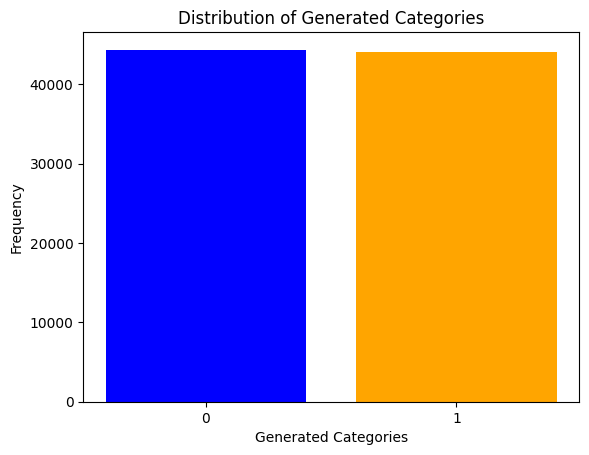

In [4]:
counts = final_df['generated'].value_counts()
print(counts)

plt.bar(counts.index, counts, color=['blue', 'orange'])
plt.xlabel('Generated Categories')
plt.ylabel('Frequency')
plt.title('Distribution of Generated Categories')

# Set x-axis ticks to category values
plt.xticks(counts.index)

plt.show()

In [7]:
final_df = final_df.groupby('generated').apply(lambda x: x.sample(n=2000, random_state=42)).reset_index(drop=True)

In [9]:
final_df.to_csv('data/mytrain.csv', index=False)